# Intro to NLP for AI | 04 - Sentiment Analysis | Practical Example

In [2]:
import numpy as np
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [3]:
data = pd.read_csv('book_reviews_sample.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       100 non-null    int64 
 1   reviewText  100 non-null    object
 2   rating      100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [5]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [6]:
data.loc[0]

index                                                     11494
reviewText    Clean and funny. A bit busy with all the diffe...
rating                                                        3
Name: 0, dtype: object

In [7]:
data.loc[0, 'reviewText']

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [8]:
data['reviewText_clean'] = data['reviewText'].str.lower()

In [9]:
data['reviewText_clean'] = data.apply(lambda x: re.sub(r"[^\w\s]", "", x['reviewText_clean']), axis=1)

In [10]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [13]:
vader_sentiment = SentimentIntensityAnalyzer()

In [15]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda review: vader_sentiment.polarity_scores(review)['compound'])

In [16]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [17]:
bins = [-1, -0.1, 0.1, 1]
names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
data['vader_sentiment_label'] = pd.cut(data['vader_sentiment_score'], bins, labels=names)

In [18]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score,vader_sentiment_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,POSITIVE
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,POSITIVE
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,POSITIVE
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,POSITIVE
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,NEGATIVE


In [19]:
data['vader_sentiment_label'].value_counts()

vader_sentiment_label
POSITIVE    68
NEGATIVE    19
NEUTRAL     13
Name: count, dtype: int64

<Axes: xlabel='vader_sentiment_label'>

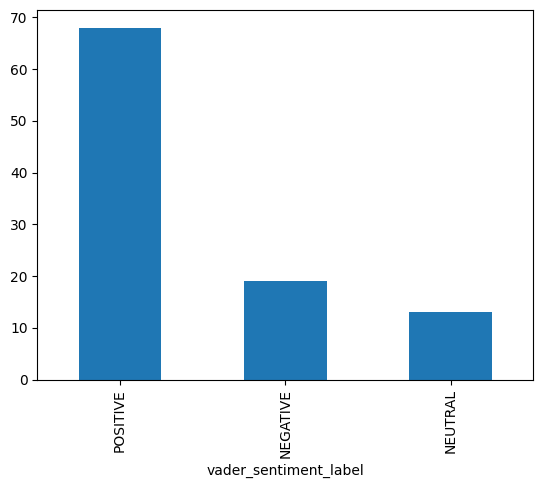

In [20]:
data['vader_sentiment_label'].value_counts().plot.bar()

In [21]:
transformer_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [22]:
transformer_labels = []
for review in data['reviewText_clean'].values:
    sentiment_list = transformer_pipeline(review)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)

In [24]:
data['transformer_sentiment_label'] = transformer_labels

<Axes: xlabel='transformer_sentiment_label'>

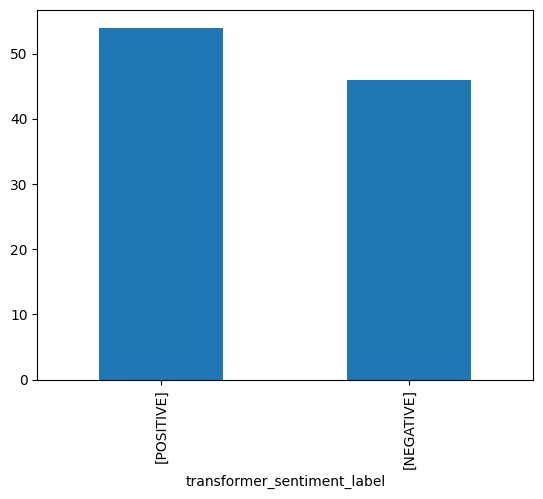

In [26]:
data['transformer_sentiment_label'].value_counts().plot.bar()